Gráfico de homiciodeos por arma de fogo entre os anos de 2000 e 2019

Por: Augusto e Catlen 

In [1]:
import plotly.express as px                                                                                                                                                                                     
import plotly.offline as py                                                                                                                                                                                     
import plotly.graph_objects as po                                                                                                                                                                               
import pandas

In [2]:
def SepararPorAno(lista_arquivo): # Lista_arquivos recebe tudo que está em lista_homens (passagem por parâmetro)                                                                                                
    lista_com_os_anos = []                                                                                                                                                                                      
    lista_mortes_por_ano = []                                                                                                                                                                                   
                                                                                                                                                                                                                
    for coluna in lista_arquivo:                                                                                                                                                                                
        for linha in coluna:                   # "For" serve para percorrer todas as linhas da lista_arquivo                                                                                                    
            ano = int(linha.split(";")[2])     # Variavel ano recebe o conteudo presente na posição [2]                                                                                                         
            if ano not in lista_com_os_anos:   # Verifica se o ano já esta na lista_com_os_anos                                                                                                                 
                lista_com_os_anos.append(ano)  # Coloca o ano na lista_com_os_anos                                                                                                                              
                lista_mortes_por_ano.append(0) # Coloca o valor zero na lista_mortes_por_ano                                                                                                                    
                                                                                                                                                                                                                
    for coluna in lista_arquivo:                                                                                                                                                                                
        for linha in coluna:                                                                                                                                                                                    
            ano = int(linha.split(";")[2])                               # Variavel ano recebe o conteudo presente na posição [2]                                                                               
            mortes = (int(linha.split(';')[3]))                          # Variavel mortes recebe o conteudo presente na posição [3]                                                                            
            lista_mortes_por_ano[lista_com_os_anos.index(ano)] += mortes # Soma todas as mortes que o ocorreram em um determinado ano e armazena esse valor na lista_mortes_por_ano                             
                                                                                                                                                                                                                
    return lista_mortes_por_ano,lista_com_os_anos  # retorna as listas para a localização onde a função foi chamada                                                                                             
        #   EXEMPLO:                                                                                                                                                                                            
        #           lista_homicidios_homens_por_ano = lista_mortes_por_ano                                                                                                                                      
        #           lista_anos_homens = lista_com_os_anos                                                                                                                                                       


In [3]:
                                                                                                                                                                                                                
                                                                                                                                                                                                                
arquivo_homens = pandas.read_csv("homicidios-de-homens-por-armas-de-fogo-uf.csv") # ler a tabela do excel (540 x 1)                                                                                             
arquivo_mulheres = pandas.read_csv("homicidios-de-mulheres-por-armas-de-fogo-uf.csv") # ler a tabela do excel (540 x 1)                                                                                         
                                                                                                                                                                                                            
lista_homens = arquivo_homens.values # tranformar tabela do excel em uma lista                                                                                                                                  
lista_mulheres = arquivo_mulheres.values # tranformar tabela do excel em uma lista                                                                                                                              
                                                                                                                                                                                                                                                                                                                                                                                                                               
lista_homicidios_homens_por_ano,lista_anos_homens = SepararPorAno(lista_homens) # chama a função SepararPorAno                                                                                                  
lista_homicidios_mulheres_por_ano,lista_anos_mulheres = SepararPorAno(lista_mulheres)  # chama a função SepararPorAno                                                                                           


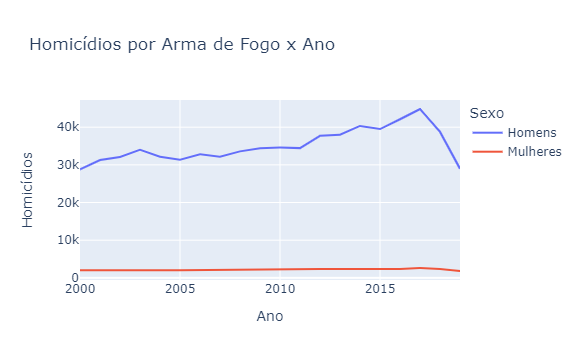

In [6]:
grafico = po.Figure()                                                                                                                                                                                           
                                                                                                                                                                                                                
grafico.add_scatter(x=lista_anos_homens,y=lista_homicidios_homens_por_ano,name="Homens",mode="lines")                                                                                                           
                                                                                                                                                                                                                
grafico.add_scatter(x=lista_anos_mulheres,y=lista_homicidios_mulheres_por_ano,name="Mulheres",mode="lines")                                                                                                     
                                                                                                                                                                                                                
grafico.update_layout(title="Homicídios por Arma de Fogo x Ano",xaxis_title="Ano",yaxis_title="Homicídios",legend_title="Sexo",hovermode="x unified")                                                           